# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

print(weather_api_key)

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

f56afc46ae7e741502d249bb8f2d54ca


### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
#print(cities)

Number of cities in the list: 613


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
#use dataset to see location of each value
url = "http://api.openweathermap.org/data/2.5/weather?"
units="imperial"
apiKey=weather_api_key
#city="hithadhoo"
city_url = f"{url}appid={apiKey}&units={units}&q={city}"
city_weather = requests.get(city_url).json()
print(city_weather)


{'coord': {'lon': -70.9167, 'lat': -53.15}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 42.91, 'feels_like': 35.26, 'temp_min': 42.12, 'temp_max': 42.91, 'pressure': 1004, 'humidity': 52}, 'visibility': 10000, 'wind': {'speed': 16.11, 'deg': 190}, 'clouds': {'all': 40}, 'dt': 1680126277, 'sys': {'type': 1, 'id': 8487, 'country': 'CL', 'sunrise': 1680087639, 'sunset': 1680129365}, 'timezone': -10800, 'id': 3874787, 'name': 'Punta Arenas', 'cod': 200}


In [5]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units="metric"
apiKey=weather_api_key



# Define an empty list to fetch the weather data for each city
city_data = []


# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={apiKey}&units={units}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()


        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        #city = city_weather['name']
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | presidencia roque saenz pena
Processing Record 2 of Set 1 | mataura
Processing Record 3 of Set 1 | nome
Processing Record 4 of Set 1 | saint george
Processing Record 5 of Set 1 | vaini
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | asau
Processing Record 8 of Set 1 | bria
Processing Record 9 of Set 1 | iqaluit
Processing Record 10 of Set 1 | butaritari
Processing Record 11 of Set 1 | busselton
Processing Record 12 of Set 1 | dawson creek
Processing Record 13 of Set 1 | ahipara
Processing Record 14 of Set 1 | qianan
Processing Record 15 of Set 1 | dale
Processing Record 16 of Set 1 | hermanus
Processing Record 17 of Set 1 | katsuura
Processing Record 18 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 19 of Set 1 | susangerd
Processing Record 20 of Set 1 | biak
Processing Record 21 of Set 1 | carnarvon
Processing Record 22 of Set 1 | new norfolk
Process

Processing Record 40 of Set 4 | ailigandi
Processing Record 41 of Set 4 | rio grande
Processing Record 42 of Set 4 | okha
Processing Record 43 of Set 4 | sao filipe
Processing Record 44 of Set 4 | nishiwaki
Processing Record 45 of Set 4 | olafsvik
Processing Record 46 of Set 4 | sistranda
Processing Record 47 of Set 4 | lagoa
Processing Record 48 of Set 4 | nola
Processing Record 49 of Set 4 | mapiripan
Processing Record 0 of Set 5 | rumoi
Processing Record 1 of Set 5 | coahuayana
Processing Record 2 of Set 5 | alofi
Processing Record 3 of Set 5 | lompoc
Processing Record 4 of Set 5 | scottsburgh
City not found. Skipping...
Processing Record 5 of Set 5 | yongan
Processing Record 6 of Set 5 | haibowan
City not found. Skipping...
Processing Record 7 of Set 5 | hailar
Processing Record 8 of Set 5 | agua branca
Processing Record 9 of Set 5 | mozarlandia
Processing Record 10 of Set 5 | lerwick
Processing Record 11 of Set 5 | washington
Processing Record 12 of Set 5 | akkudah
City not found.

Processing Record 32 of Set 8 | mananara
Processing Record 33 of Set 8 | yanan
City not found. Skipping...
Processing Record 34 of Set 8 | falun
Processing Record 35 of Set 8 | saldanha
Processing Record 36 of Set 8 | marcona
City not found. Skipping...
Processing Record 37 of Set 8 | birjand
Processing Record 38 of Set 8 | flinders
Processing Record 39 of Set 8 | ostersund
Processing Record 40 of Set 8 | paita
Processing Record 41 of Set 8 | pampas
Processing Record 42 of Set 8 | mrakovo
Processing Record 43 of Set 8 | vanavara
Processing Record 44 of Set 8 | vestmanna
Processing Record 45 of Set 8 | trelew
Processing Record 46 of Set 8 | china
Processing Record 47 of Set 8 | sangar
Processing Record 48 of Set 8 | zakamensk
Processing Record 49 of Set 8 | qaqortoq
Processing Record 0 of Set 9 | presque isle
Processing Record 1 of Set 9 | wulanhaote
City not found. Skipping...
Processing Record 2 of Set 9 | port blair
Processing Record 3 of Set 9 | axim
Processing Record 4 of Set 9 | o

Processing Record 23 of Set 12 | keflavik
Processing Record 24 of Set 12 | greenfield
Processing Record 25 of Set 12 | yeppoon
Processing Record 26 of Set 12 | tucuman
Processing Record 27 of Set 12 | bambanglipuro
Processing Record 28 of Set 12 | grand gaube
Processing Record 29 of Set 12 | coihaique
Processing Record 30 of Set 12 | pagudpud
Processing Record 31 of Set 12 | bardiyah
Processing Record 32 of Set 12 | harper
Processing Record 33 of Set 12 | wajid
Processing Record 34 of Set 12 | duncan
Processing Record 35 of Set 12 | college
Processing Record 36 of Set 12 | nangomba
Processing Record 37 of Set 12 | nam tha
City not found. Skipping...
Processing Record 38 of Set 12 | celestun
Processing Record 39 of Set 12 | verkhoyansk
Processing Record 40 of Set 12 | coolum beach
Processing Record 41 of Set 12 | ghamarwin
City not found. Skipping...
Processing Record 42 of Set 12 | gatton
Processing Record 43 of Set 12 | rocha
Processing Record 44 of Set 12 | hargeysa
Processing Record

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df =pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          564
Lat           564
Lng           564
Max Temp      564
Humidity      564
Cloudiness    564
Wind Speed    564
Country       564
Date          564
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,presidencia roque saenz pena,-26.7852,-60.4388,33.66,36,20,2.48,AR,1680126337
1,mataura,-46.1927,168.8643,9.15,59,20,2.78,NZ,1680126337
2,nome,64.5011,-165.4064,-3.83,93,100,10.80,US,1680126337
3,saint george,37.1041,-113.5841,20.70,26,20,12.86,US,1680126337
4,vaini,-21.2000,-175.2000,28.09,78,20,2.57,TO,1680126337


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,presidencia roque saenz pena,-26.7852,-60.4388,33.66,36,20,2.48,AR,1680126337
1,mataura,-46.1927,168.8643,9.15,59,20,2.78,NZ,1680126337
2,nome,64.5011,-165.4064,-3.83,93,100,10.80,US,1680126337
3,saint george,37.1041,-113.5841,20.70,26,20,12.86,US,1680126337
4,vaini,-21.2000,-175.2000,28.09,78,20,2.57,TO,1680126337


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

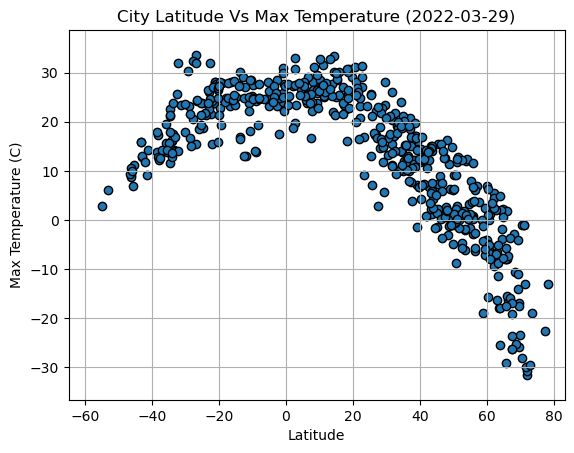

In [10]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values,y_values, edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('City Latitude Vs Max Temperature (2022-03-29)')
plt.xlim(min(x_values)-10, max(x_values)+ 5)
plt.ylim(min(y_values)- 5, max(y_values) + 5)
plt.grid()


# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

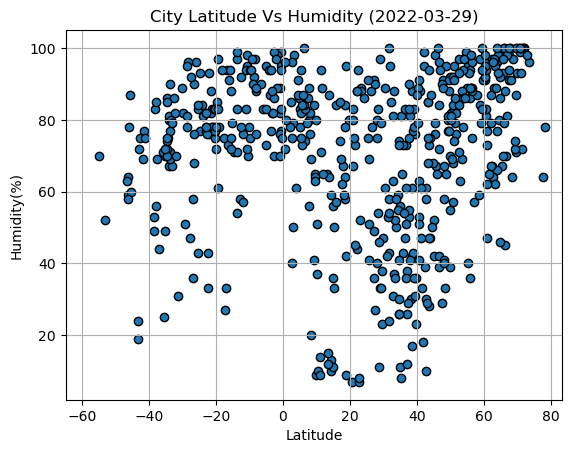

In [11]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.scatter(x_values,y_values, edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.title('City Latitude Vs Humidity (2022-03-29)')
plt.xlim(min(x_values)-10, max(x_values)+ 5)
plt.ylim(min(y_values)- 5, max(y_values) + 5)
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

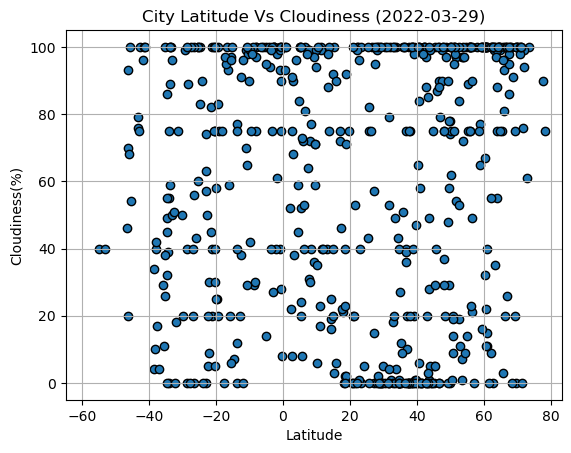

In [12]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.scatter(x_values,y_values, edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.title('City Latitude Vs Cloudiness (2022-03-29)')
plt.xlim(min(x_values)-10, max(x_values)+ 5)
plt.ylim(min(y_values)- 5, max(y_values) + 5)
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

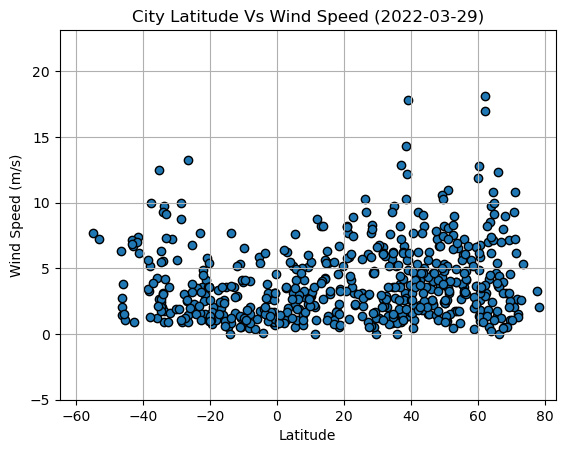

In [13]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values,y_values, edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Latitude Vs Wind Speed (2022-03-29)')
plt.xlim(min(x_values)-10, max(x_values)+ 5)
plt.ylim(min(y_values)- 5, max(y_values) + 5)
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,nome,64.5011,-165.4064,-3.83,93,100,10.80,US,1680126337
3,saint george,37.1041,-113.5841,20.70,26,20,12.86,US,1680126337
6,asau,46.4333,26.4000,0.71,84,90,2.32,RO,1680126337
7,bria,6.5423,21.9863,24.49,74,100,1.92,CF,1680126337
8,iqaluit,63.7506,-68.5145,-17.95,77,75,9.77,CA,1680126337


In [22]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,presidencia roque saenz pena,-26.7852,-60.4388,33.66,36,20,2.48,AR,1680126337
1,mataura,-46.1927,168.8643,9.15,59,20,2.78,NZ,1680126337
4,vaini,-21.2000,-175.2000,28.09,78,20,2.57,TO,1680126337
5,ushuaia,-54.8000,-68.3000,2.81,70,40,7.72,AR,1680126102
10,busselton,-33.6500,115.3333,17.46,71,100,9.71,AU,1680126338


###  Temperature vs. Latitude Linear Regression Plot

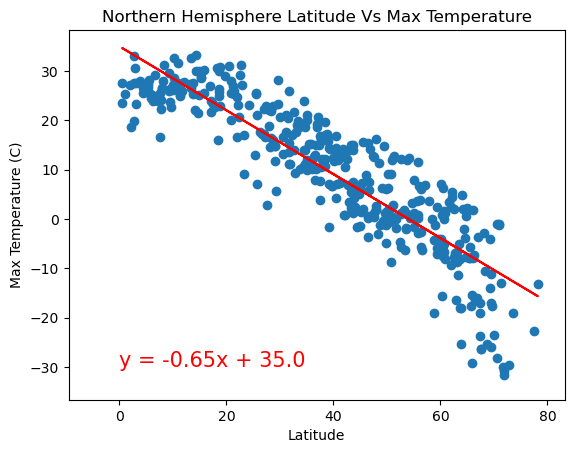

The r-value is: 0.7913117416714811.


In [39]:
# Linear regression on Northern Hemisphere
# Build scatter plot for latitude vs. temperature
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('Northern Hemisphere Latitude Vs Max Temperature')
plt.xlim(min(x_values)-10, max(x_values)+ 5)
plt.ylim(min(y_values)- 5, max(y_values) + 5)

#Run linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,-30),fontsize=15,color="red")

# Show plot and display rvalue
plt.show()
print(f'The r-value is: {rvalue**2}.')

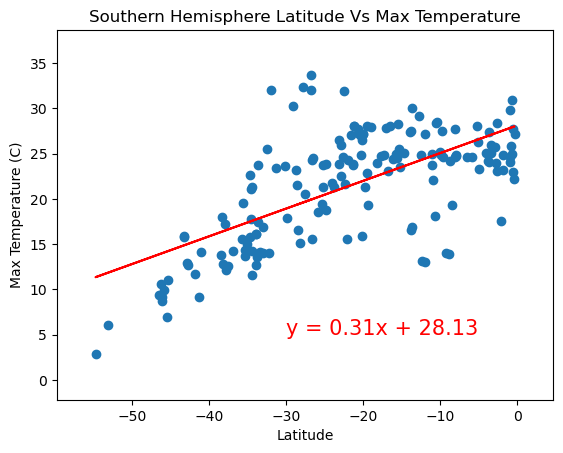

The r-value is: 0.431552374902116.


In [38]:
# Linear regression on Southern Hemisphere
# Build scatter plot for latitude vs. temperature
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('Southern Hemisphere Latitude Vs Max Temperature')
plt.xlim(min(x_values)-5, max(x_values)+ 5)
plt.ylim(min(y_values)- 5, max(y_values) + 5)

#Run linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,5),fontsize=15,color="red")

# Show plot and display rvalue
plt.show()
print(f'The r-value is: {rvalue**2}.')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

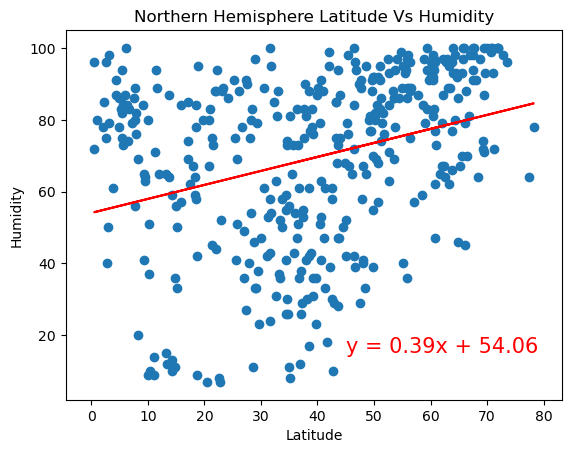

The r-value is: 0.09940859355476868.


In [40]:
# Northern Hemisphere

# Build scatter plot for latitude vs. temperature
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Northern Hemisphere Latitude Vs Humidity')
plt.xlim(min(x_values)-5, max(x_values)+ 5)
plt.ylim(min(y_values)- 5, max(y_values) + 5)

#Run linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,15),fontsize=15,color="red")

# Show plot and display rvalue
plt.show()
print(f'The r-value is: {rvalue**2}.')

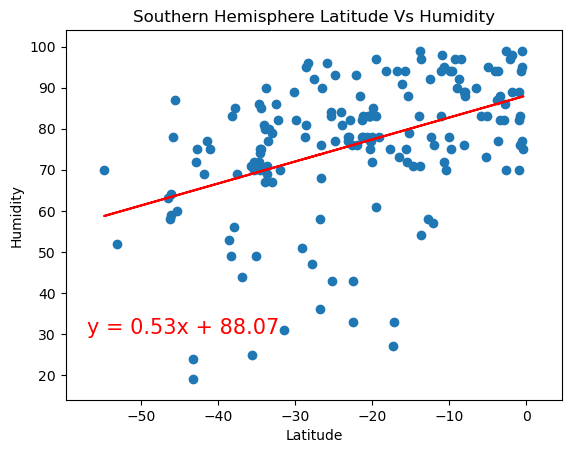

The r-value is: 0.18851783640633585.


In [44]:
# Southern Hemisphere
# Build scatter plot for latitude vs. temperature
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Southern Hemisphere Latitude Vs Humidity')
plt.xlim(min(x_values)-5, max(x_values)+ 5)
plt.ylim(min(y_values)- 5, max(y_values) + 5)

#Run linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-57,30),fontsize=15,color="red")

# Show plot and display rvalue
plt.show()
print(f'The r-value is: {rvalue**2}.')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

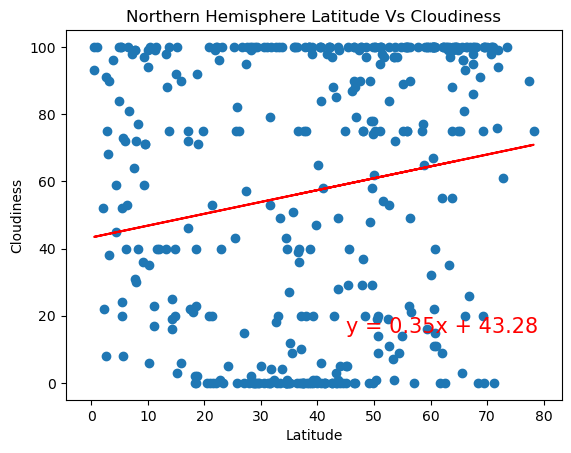

The r-value is: 0.029735611062323888.


In [45]:
# Northern Hemisphere
# Build scatter plot for latitude vs. temperature
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Northern Hemisphere Latitude Vs Cloudiness')
plt.xlim(min(x_values)-5, max(x_values)+ 5)
plt.ylim(min(y_values)- 5, max(y_values) + 5)

#Run linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,15),fontsize=15,color="red")

# Show plot and display rvalue
plt.show()
print(f'The r-value is: {rvalue**2}.')

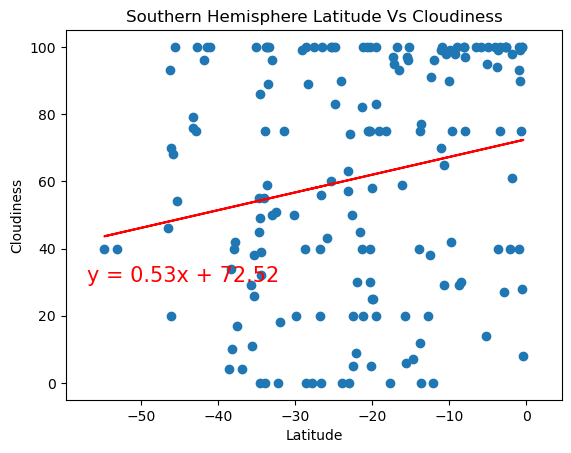

The r-value is: 0.040378628096724385.


In [46]:
# Southern Hemisphere
# Build scatter plot for latitude vs. temperature
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Southern Hemisphere Latitude Vs Cloudiness')
plt.xlim(min(x_values)-5, max(x_values)+ 5)
plt.ylim(min(y_values)- 5, max(y_values) + 5)

#Run linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-57,30),fontsize=15,color="red")

# Show plot and display rvalue
plt.show()
print(f'The r-value is: {rvalue**2}.')


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

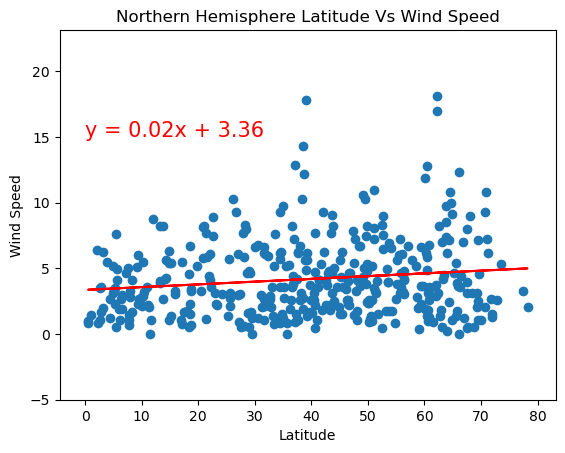

The r-value is: 0.019671200074550668.


In [48]:
# Northern Hemisphere
# Build scatter plot for latitude vs. temperature
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Northern Hemisphere Latitude Vs Wind Speed')
plt.xlim(min(x_values)-5, max(x_values)+ 5)
plt.ylim(min(y_values)- 5, max(y_values) + 5)

#Run linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,15),fontsize=15,color="red")

# Show plot and display rvalue
plt.show()
print(f'The r-value is: {rvalue**2}.')

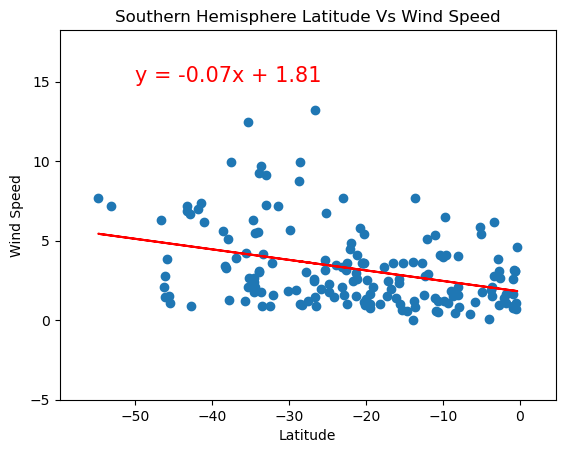

The r-value is: 0.12583323228041732.


In [51]:
# Southern Hemisphere
# Build scatter plot for latitude vs. temperature
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Southern Hemisphere Latitude Vs Wind Speed')
plt.xlim(min(x_values)-5, max(x_values)+ 5)
plt.ylim(min(y_values)- 5, max(y_values) + 5)

#Run linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,15),fontsize=15,color="red")

# Show plot and display rvalue
plt.show()
print(f'The r-value is: {rvalue**2}.')

**Discussion about the linear relationship:** YOUR RESPONSE HERE